In [74]:
import warnings
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os
import csv
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Loading an audio

In [76]:
warnings.filterwarnings("ignore")
audio_path = 'dataset/belfast/b_coo1_f2.wav'
x, sr = librosa.load(audio_path)
print(sr)

22050


In [26]:
ipd.Audio(audio_path)

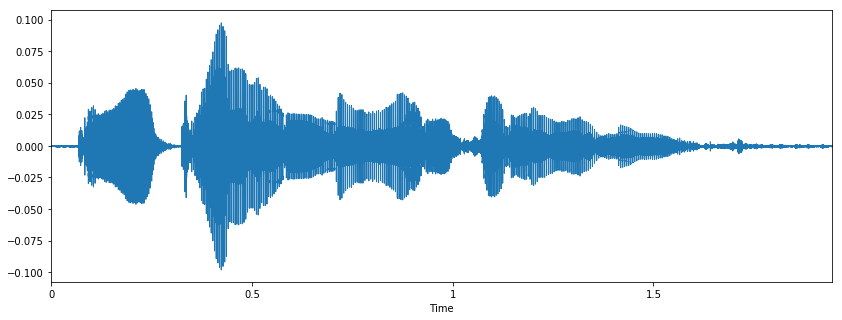

In [27]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

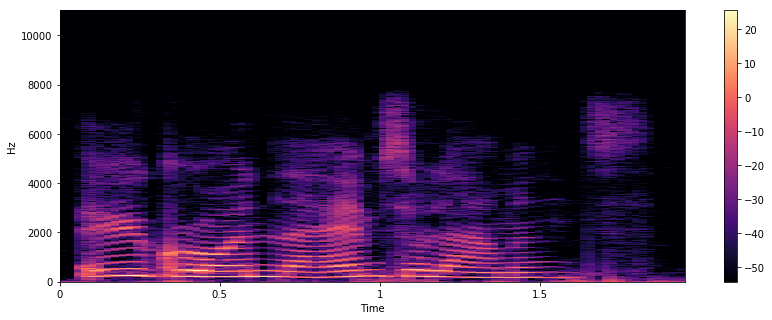

In [28]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Feature Extraction

(20, 84)


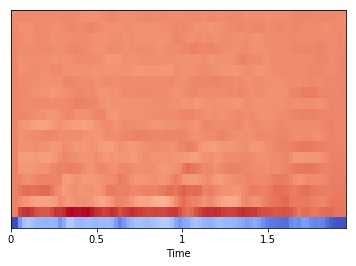

In [36]:
#MFCC
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [42]:
#Spectral Flux
spectral_flux = librosa.onset.onset_strength(y=x, sr=sr)
print(spectral_flux)
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
# plt.plot(times, 2 + spectral_flux / spectral_flux.max(), alpha=0.8, label='Mean (mel)')

[ 0.          0.          0.          0.3816453  15.905002   10.0176115
  3.0313847   0.9296514   1.3956348   1.9009373   1.649678    1.5308938
  2.6636243   1.945945    0.0390121   5.5556498   8.833828    1.2869267
  0.5900135   1.4962647   2.5787566   2.2606695   1.1774226   1.1267624
  2.1465962   1.5118927   2.3551755   1.1401017   0.13709366  0.16350815
  5.1467314   4.736968    4.4381027   3.4027967   1.8994982   1.3988098
  0.6801995   1.8379526   2.714341    3.3915231   2.8492973   2.2821732
  0.7263551   0.35437799  1.2185704   4.901909    3.1347804   4.3932347
  3.4360583   1.3637503   1.237152    1.4045427   1.5716903   4.0474005
  2.8655968   1.4487209   1.9648476   1.9650589   1.6760477   1.1922902
  1.1018147   0.56651974  2.6586287   2.5703669   0.32287326  0.14699778
  0.54399794  0.828583    0.82795787  0.91541773  0.6626445   0.573992
  6.0182      2.762141    1.159823    3.9599314   0.62454206  0.04318017
  0.4133955   1.392691    0.5248461   0.18444978  0.26550692  

## Building the dataset

In [44]:
header = ''
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
print(header)

['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [50]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
dialects = 'belfast bradford cambridge dublin leeds london newcastle cardiff liverpool'.split()
for g in dialects:
    for filename in os.listdir(f'./dataset/{g}'):
        audio = f'./dataset/{g}/{filename}'
        y, sr = librosa.load(audio)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f''
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
    print(g)

belfast
bradford
cambridge
dublin
leeds
london
newcastle
cardiff
liverpool


## Creating the dataframe

In [57]:
data = pd.read_csv('data.csv')
data.head()

mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  \
0 -631.514465   86.174805 -10.376870  57.646114  17.333046  -2.404931   
1 -670.081726  117.535080 -11.908139  40.111732 -15.172367  19.182095   
2 -595.802734  125.064972  -7.834674  44.818668  -2.045204  10.025669   
3 -320.157471  143.782593  17.622152  45.143311  -1.654955  14.532562   
4 -409.936493  125.700722 -13.332328  50.261276  -7.515942  16.006376   

       mfcc7      mfcc8     mfcc9     mfcc10  ...     mfcc12     mfcc13  \
0 -33.336617 -23.425192  0.879047  -8.421023  ... -19.037979 -13.024996   
1  -7.310659  13.362074 -6.295150   2.179146  ...  -4.958920   2.827340   
2  -1.551607   0.754351  3.311770  -3.694872  ...  -0.839407   3.858758   
3  -9.143901   4.858474 -0.586168 -10.734169  ...   0.211696  -7.487833   
4  -6.207216   0.961710  4.182048   3.157343  ...  -3.202236   8.429362   

      mfcc14    mfcc15     mfcc16     mfcc17     mfcc18    mfcc19    mfcc20  \
0  -6.257982 -7.534490 -11.197049  -5.329919 -10.129889 -5.701937  6.378778   
1  -3.401742  4.501762  -7.039964  10.120046  -1.408288 -1.193361  3.048715   
2   0.668269 -0.581544  -3.429765   3.208364   2.562906  2.063939  2.706446   
3   2.772522  0.066804  -7.373764   4.776436  -4.813834 -1.592582 -6.868067   
4  13.005360  0.711278  -3.467225   7.263579  -5.191166 -3.199972  0.109674   

     label  
0  belfast  
1  belfast  
2  belfast  
3  belfast  
4  belfast  

[5 rows x 21 columns]

In [60]:
dialect_list = data.iloc[:, -1]
encoder = LabelEncoder()
labels = encoder.fit_transform(dialect_list)
print(labels)

[0 0 0 ... 6 6 6]


In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:,:-1], dtype = float))

## Model Building

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)

In [77]:
#Logistic Regression
logistic_classifier = linear_model.logistic.LogisticRegression()
logistic_classifier.fit(X_train, y_train)
logistic_predictions = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("logistic accuracy = " + str(logistic_accuracy))

logistic accuracy = 0.7151898734177216


In [78]:
#SVM
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("svm accuracy = " + str(svm_accuracy))

svm accuracy = 0.9430379746835443


In [79]:
#KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("knn accuracy = " + str(knn_accuracy))

knn accuracy = 0.9472573839662447
